# Verify the difference in accuracy by parameters

* Model
* Seed
* Ensemble
* Recycle

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 150
sns.set(style='darkgrid')
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)
from pathlib import Path
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.size"] = 15
plt.rcParams['figure.figsize'] = (6, 4)

In [2]:
data_dir = Path('../../../../../data/')
dataset_dir = data_dir / 'out' / 'dataset'
subset_name = 'target_subset_' + Path('.').resolve().parent.name
score_dir = dataset_dir / 'score' / 'subsets' / subset_name
assert score_dir.exists()
fig_dir = score_dir / 'fig' / 'accuracy'
fig_dir.mkdir(parents=True, exist_ok=True)
target_list = data_dir / 'interim' / f'{subset_name}.csv'
assert target_list.exists()

In [3]:
label_path = score_dir / 'label.csv'
label_df = pd.read_csv(label_path, index_col=0)
target_df = pd.read_csv(target_list, index_col=0)
df = pd.merge(label_df, target_df, left_on='Target', right_on='id', how='left')
df

,Model,TMscore,GDT_TS,GDT_HA,Global_LDDT,Mean_LDDT,pLDDT,pTMscore,Tolerance,ModelName,...,Length,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2
0,model_1_ptm_seed_0_rec_10_ens_1,0.981,0.965,0.857,0.899,0.894,0.936,0.892,0.084,model_1_ptm,...,235,7DW4_A,1.570,2021-08-04T00:00:00Z,>7dw4_A mol:protein length:235 Glutathione S-...,HHHHHHMAKSDVKLLGAWPSPFVMRPRIALNIKSVEYEFLEETLGS...,235,89,13,True
1,model_1_ptm_seed_0_rec_10_ens_8,0.981,0.966,0.859,0.900,0.895,0.937,0.893,0.054,model_1_ptm,...,235,7DW4_A,1.570,2021-08-04T00:00:00Z,>7dw4_A mol:protein length:235 Glutathione S-...,HHHHHHMAKSDVKLLGAWPSPFVMRPRIALNIKSVEYEFLEETLGS...,235,89,13,True
2,model_1_ptm_seed_0_rec_1_ens_1,0.980,0.965,0.852,0.901,0.896,0.928,0.887,26.445,model_1_ptm,...,235,7DW4_A,1.570,2021-08-04T00:00:00Z,>7dw4_A mol:protein length:235 Glutathione S-...,HHHHHHMAKSDVKLLGAWPSPFVMRPRIALNIKSVEYEFLEETLGS...,235,89,13,True
3,model_1_ptm_seed_0_rec_1_ens_8,0.980,0.964,0.856,0.899,0.895,0.928,0.887,26.413,model_1_ptm,...,235,7DW4_A,1.570,2021-08-04T00:00:00Z,>7dw4_A mol:protein length:235 Glutathione S-...,HHHHHHMAKSDVKLLGAWPSPFVMRPRIALNIKSVEYEFLEETLGS...,235,89,13,True
4,model_1_ptm_seed_0_rec_2_ens_1,0.980,0.961,0.852,0.900,0.895,0.933,0.890,0.391,model_1_ptm,...,235,7DW4_A,1.570,2021-08-04T00:00:00Z,>7dw4_A mol:protein length:235 Glutathione S-...,HHHHHHMAKSDVKLLGAWPSPFVMRPRIALNIKSVEYEFLEETLGS...,235,89,13,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36995,model_5_seed_1_rec_5_ens_1,0.966,0.900,0.735,0.835,0.823,0.784,NaN,0.917,model_5,...,447,7BUJ_A,2.130,2020-09-02T00:00:00Z,>7buj_A mol:protein length:447 Cyclic GMP-AMP...,PRVHPARATELTKDAQPSAMDAAGATARPAVRVPQQQAILDPELPA...,447,2,2,False
36996,model_5_seed_1_rec_6_ens_1,0.965,0.902,0.737,0.835,0.824,0.784,NaN,1.534,model_5,...,447,7BUJ_A,2.130,2020-09-02T00:00:00Z,>7buj_A mol:protein length:447 Cyclic GMP-AMP...,PRVHPARATELTKDAQPSAMDAAGATARPAVRVPQQQAILDPELPA...,447,2,2,False
36997,model_5_seed_1_rec_7_ens_1,0.965,0.901,0.735,0.835,0.824,0.785,NaN,1.668,model_5,...,447,7BUJ_A,2.130,2020-09-02T00:00:00Z,>7buj_A mol:protein length:447 Cyclic GMP-AMP...,PRVHPARATELTKDAQPSAMDAAGATARPAVRVPQQQAILDPELPA...,447,2,2,False
36998,model_5_seed_1_rec_8_ens_1,0.965,0.897,0.732,0.835,0.823,0.785,NaN,1.460,model_5,...,447,7BUJ_A,2.130,2020-09-02T00:00:00Z,>7buj_A mol:protein length:447 Cyclic GMP-AMP...,PRVHPARATELTKDAQPSAMDAAGATARPAVRVPQQQAILDPELPA...,447,2,2,False


## Difference between models

In [4]:
df.columns

Index(['Model', 'TMscore', 'GDT_TS', 'GDT_HA', 'Global_LDDT', 'Mean_LDDT',
       'pLDDT', 'pTMscore', 'Tolerance', 'ModelName', 'Seed', 'Recycle',
       'Ensemble', 'Target', 'Num_diff', 'Num_missing', 'Length', 'id',
       'resolution', 'releasedate', 'header', 'sequence', 'length',
       'num_entry_in_cluster', 'num_entry_in_cluster_AF2_notInclude',
       'is_similar_AF2'],
      dtype='object')

<AxesSubplot:xlabel='GDT_TS', ylabel='ModelName'>

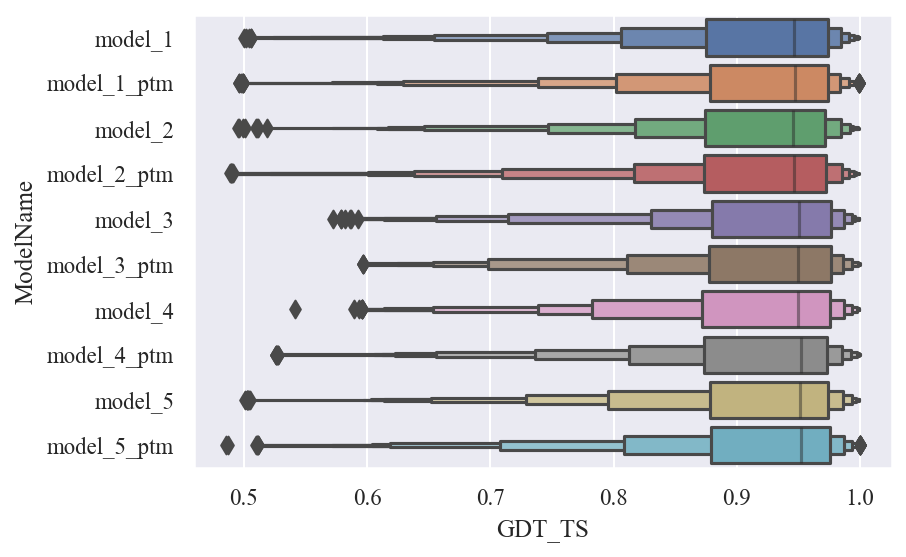

In [5]:
label = 'GDT_TS'
model_names = []
for i in range(10):
    suffix = '' if i % 2 == 0 else '_ptm'
    model_name = f'model_{i // 2 + 1}{suffix}'
    model_names.append(model_name)
sns.boxenplot(data=df, x=label, y='ModelName', order=model_names)

## Difference between seeds

In [6]:
seed_0_df = df.query('Seed == 0')
seed_1_df = df.query('Seed == 1')
seed_df = pd.merge(seed_0_df, seed_1_df, on=['ModelName', 'Ensemble', 'Recycle', 'Target'], suffixes=('_seed_0', '_seed_1'))

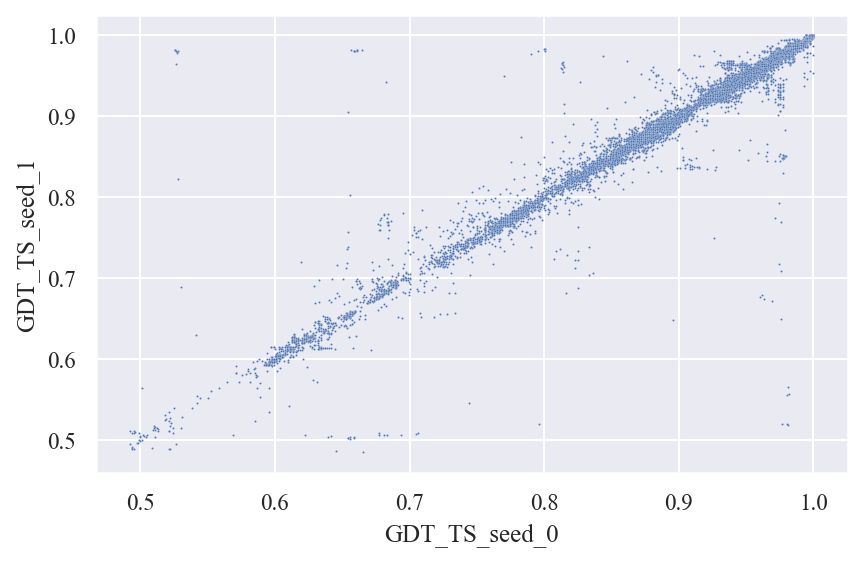

In [7]:
plt.figure(figsize=(6, 4))
label = 'GDT_TS'
sns.scatterplot(data=seed_df, x=f'{label}_seed_0', y=f'{label}_seed_1', s=1)
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{label}_seed.png')

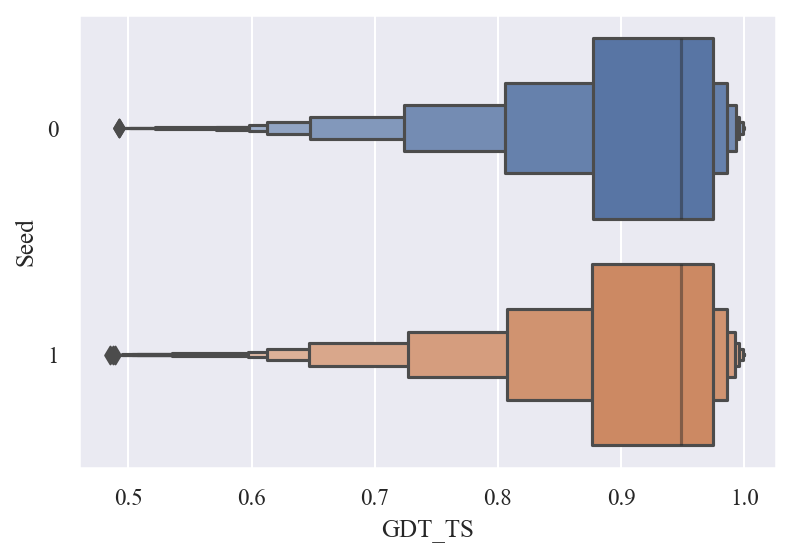

In [8]:
label = 'GDT_TS'
df['Seed'] = df['Seed'].astype(str)
sns.boxenplot(data=df, x=label, y='Seed')
df['Seed'] = df['Seed'].astype(int)


## Difference between with and without ensemble

In [9]:
df['Ensemble'] = [True if e == 8 else False for e in df['Ensemble']]
en_df = df.query('Ensemble == True')
no_en_df = df.query('Ensemble == False')
en_merge_df = pd.merge(en_df, no_en_df, on=['ModelName', 'Seed', 'Recycle', 'Target'], suffixes=('_en', '_no_en'))

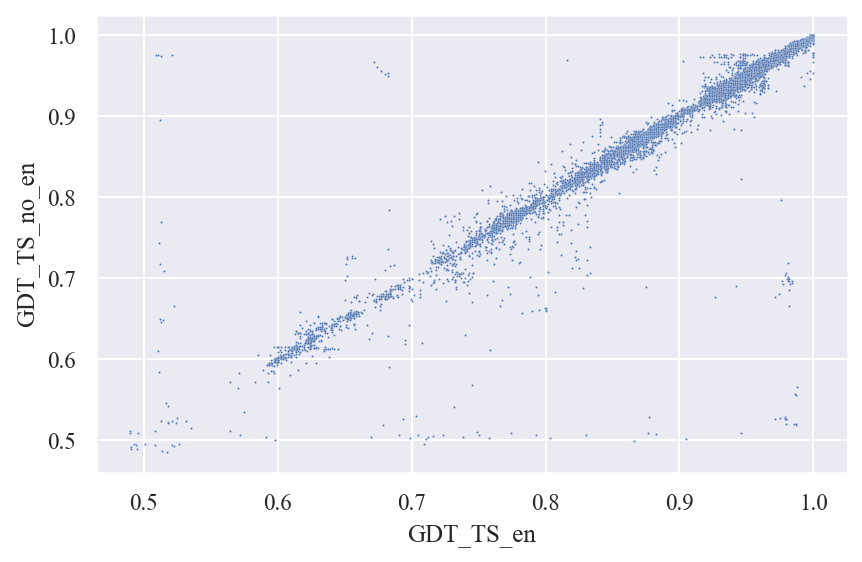

In [10]:
# Scatterplot of GDT_TS of models with and without ensemble
plt.figure(figsize=(6, 4))
label = 'GDT_TS'
sns.scatterplot(data=en_merge_df, x=f'{label}_en', y=f'{label}_no_en', s=1)
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{label}_en_or_no_en.png')

<AxesSubplot:xlabel='GDT_TS', ylabel='Ensemble'>

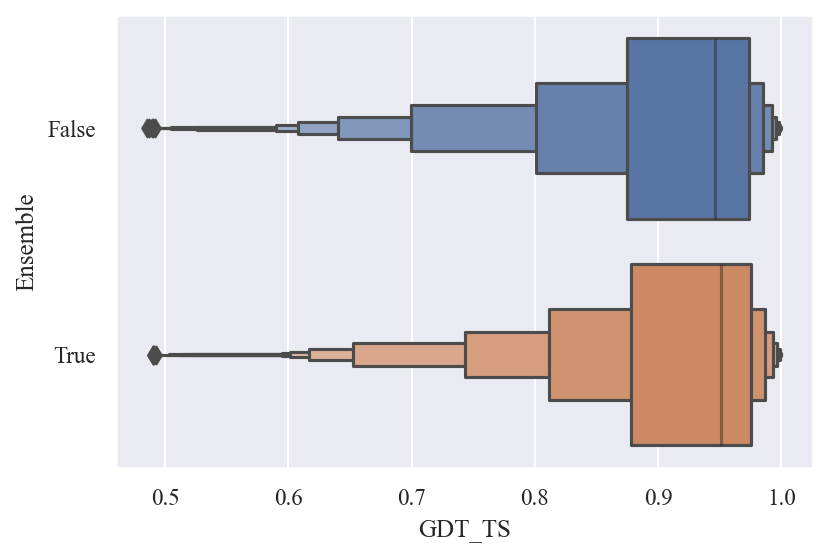

In [11]:
label = 'GDT_TS'
y = 'Ensemble'
df[y] = df[y].astype(str)
sns.boxenplot(data=df, x=label, y=y)

## Difference between recycles

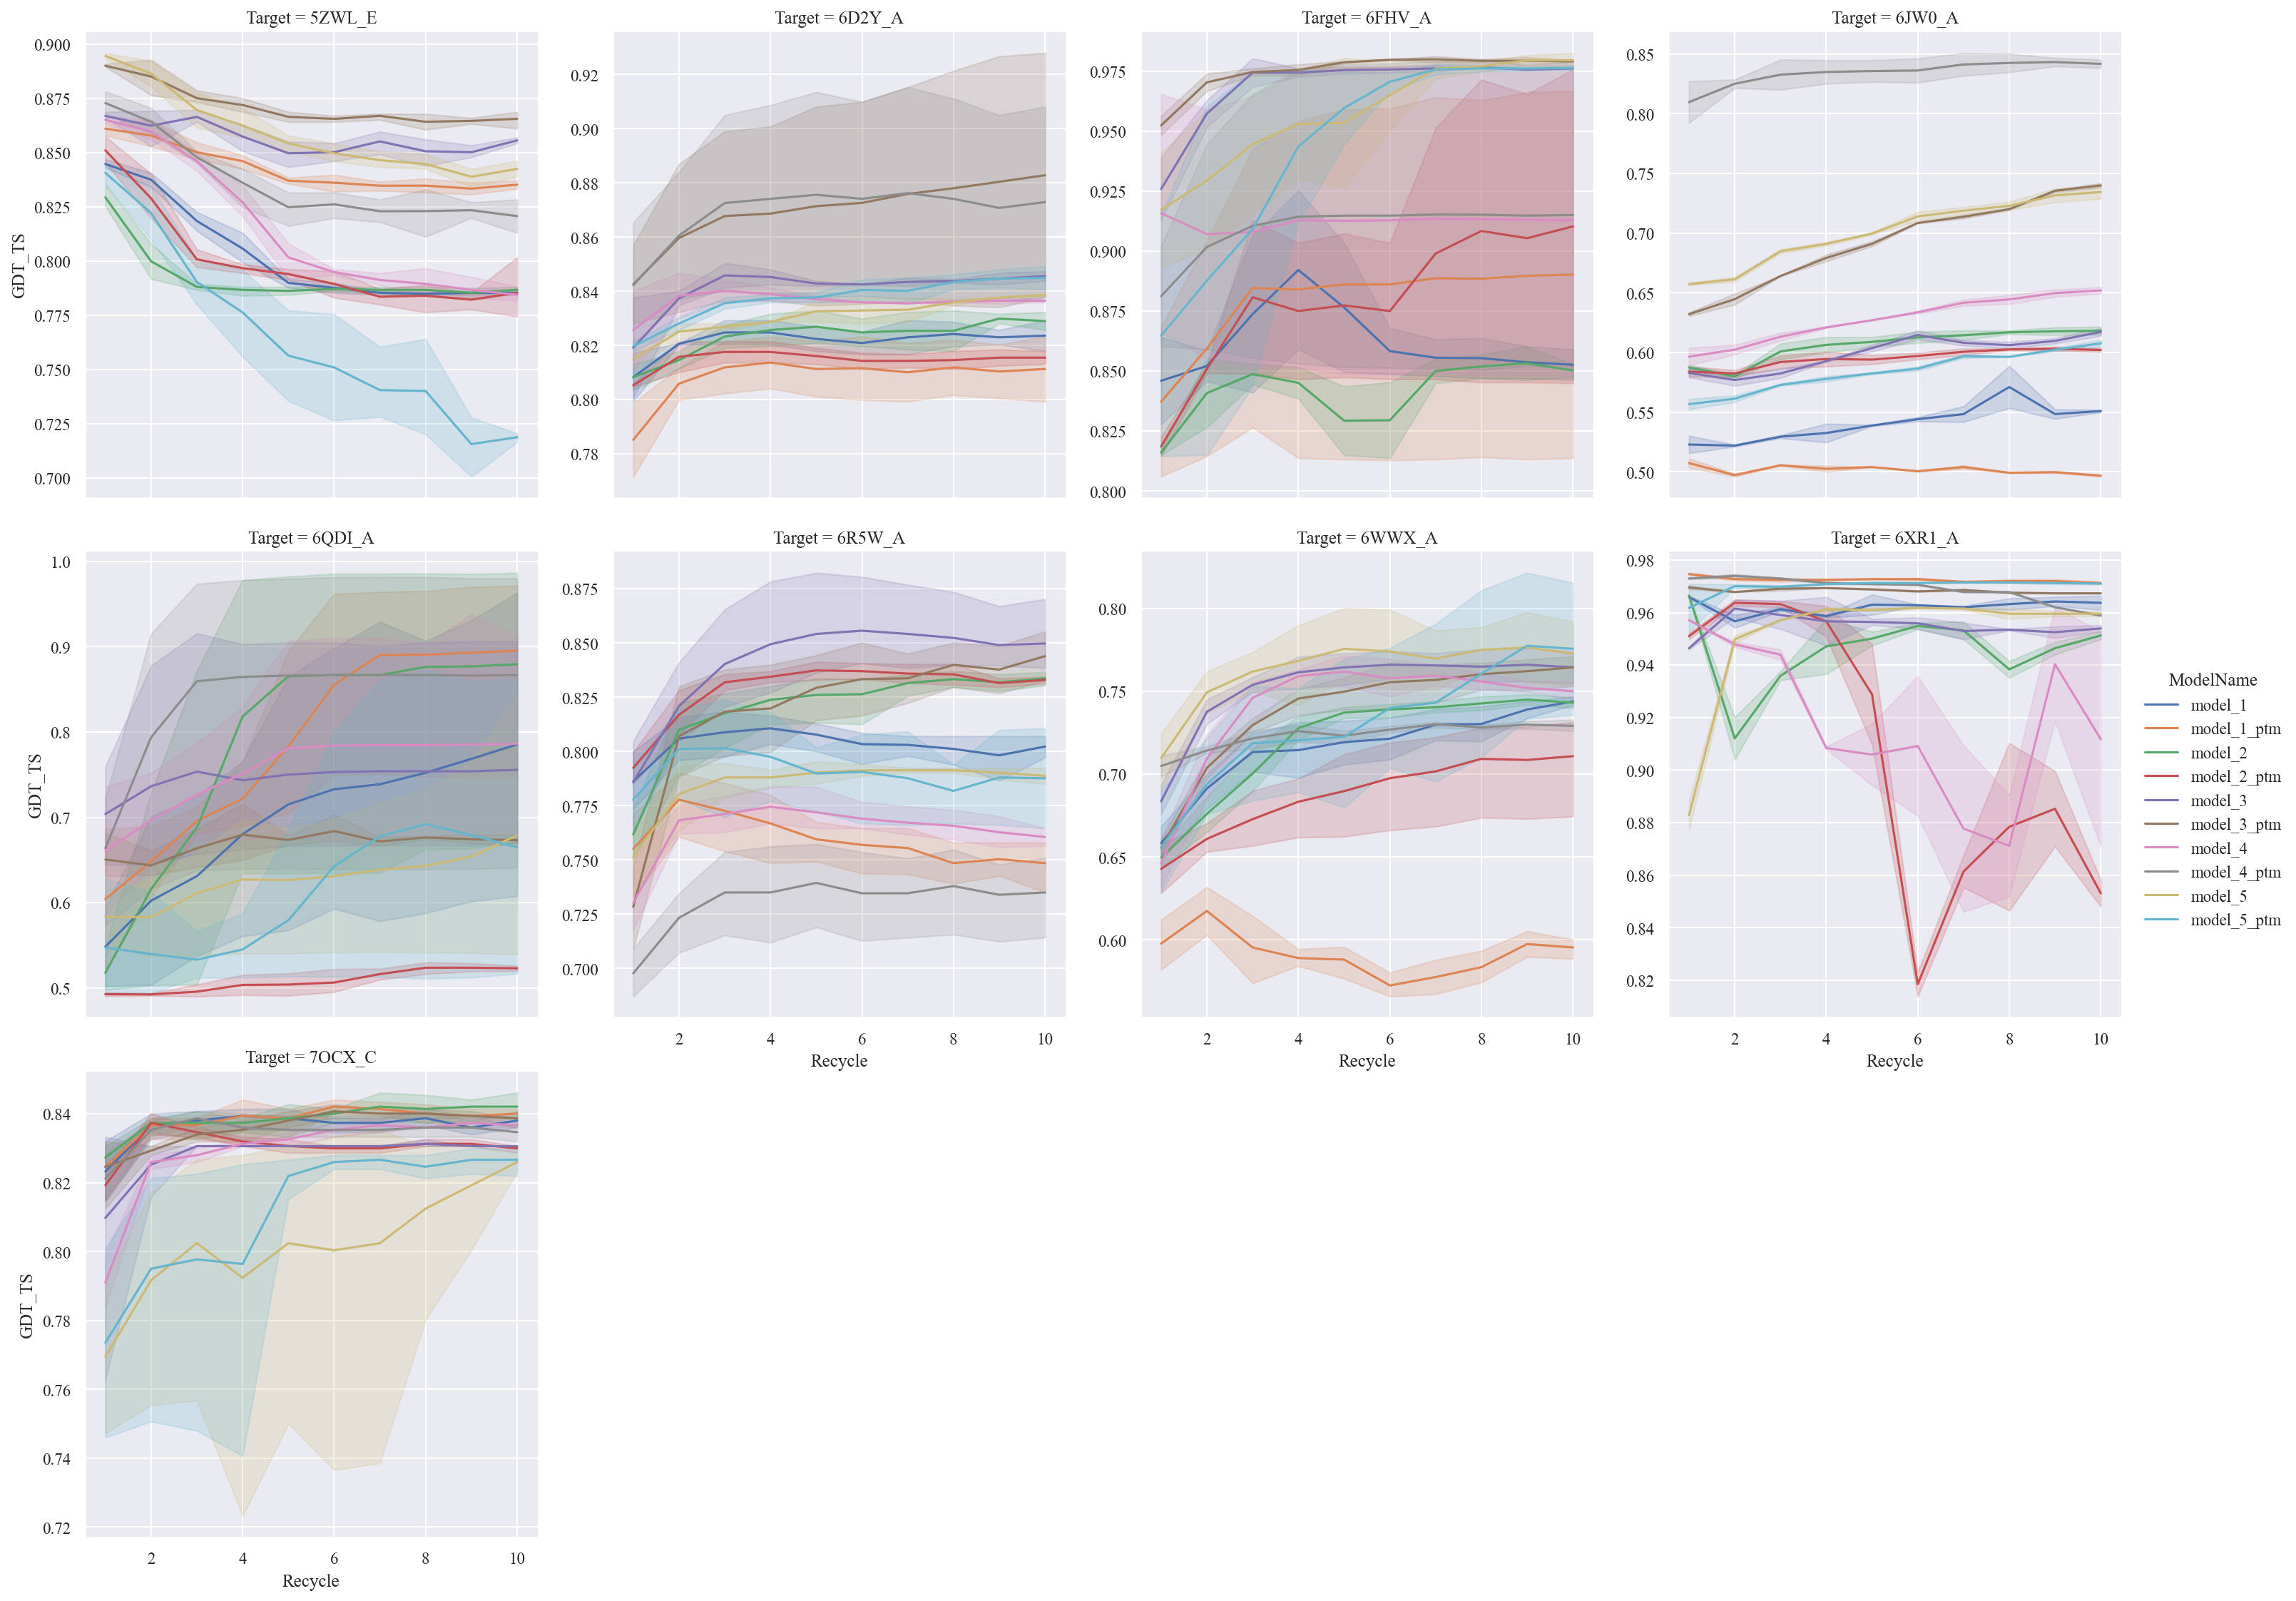

In [12]:
label = 'GDT_TS'
threshold = 0.15
# For targets whose value difference between max and min is larger than threshold
data = df.groupby('Target').filter(lambda x: x[label].max() - x[label].min() > threshold)
sns.relplot(data=data.sort_values(['Target', 'ModelName']), x='Recycle', y='GDT_TS',
            hue='ModelName', kind='line', markers=True, dashes=True,
            col='Target', col_wrap=4, facet_kws={'sharey': False, 'sharex': True})

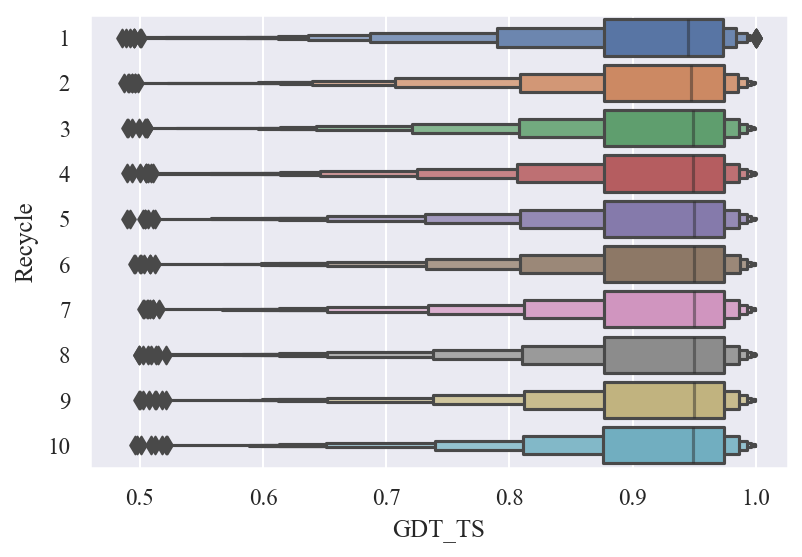

In [13]:
label = 'GDT_TS'
y = 'Recycle'
df[y] = df[y].astype(str)
sns.boxenplot(data=df, x=label, y=y, order=map(str, range(1, 11)))
df[y] = df[y].astype(int)